<center><h2>Analysis of SA Government News Agency</h2></center>

The SA Government News Agency is a news service, published by the Government Communication and Information System (GCIS).

**Purpose of the project:** find out how many articles are dedicated to the war in Ukraine.

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('sa_news_dataset.json')
df

,title,date,url
0,Government communication workforce to be upski...,2023-05-16,https://www.sanews.gov.za/south-africa/governm...
1,Keeping SA citizens informed,2023-05-16,https://www.sanews.gov.za/south-africa/keeping...
2,SA and Singapore strengthen longstanding partn...,2023-05-16,https://www.sanews.gov.za/south-africa/sa-and-...
3,Mining remains strong pillar of SA's economy -...,2023-05-16,https://www.sanews.gov.za/south-africa/mining-...
4,Over R14bn to support municipalities' water in...,2023-05-16,https://www.sanews.gov.za/south-africa/over-r1...
...,...,...,...
3700,SA records 2411 new COVID-19 cases,2022-02-25,https://www.sanews.gov.za/south-africa/sa-reco...
3701,Man held for dealing dagga,2022-02-25,https://www.sanews.gov.za/south-africa/man-hel...
3702,SA calls for Russian withdrawal from Ukraine,2022-02-25,https://www.sanews.gov.za/south-africa/sa-call...
3703,Creecy highlights urgency of moving towards a ...,2022-02-25,https://www.sanews.gov.za/south-africa/creecy-...


In [3]:
anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky"
]

In [4]:
def check(string: str):
    for word in anchors:
        if word in string.lower():
            return True
    return False

war_df = df[df['title'].apply(lambda x: check(x))]
war_df.head()

,title,date,url
16,President Ramaphosa reiterates South Africa's ...,2023-05-15,https://www.sanews.gov.za/south-africa/preside...
651,SA explains abstention from Ukraine resolution...,2023-02-25,https://www.sanews.gov.za/south-africa/sa-expl...
968,Russia-Ukraine conflict should end through dip...,2023-01-23,https://www.sanews.gov.za/south-africa/russia-...
975,SA's navy exercises between China and Russia t...,2023-01-23,https://www.sanews.gov.za/south-africa/sas-nav...
982,SANDF to host China and Russia for multilatera...,2023-01-20,https://www.sanews.gov.za/south-africa/sandf-h...


## Feb - Dec 2022

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
def get_month(date: datetime):
    return date.month

df_2022 = df[df['date'] < datetime(2023, 1, 1)]
df_2022['month'] = df_2022['date'].apply(lambda x: get_month(x))

war_df_2022 = war_df[war_df['date'] < datetime(2023, 1, 1)]
war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))
war_df_2022.head()

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_96250/4123215270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['month'] = df_2022['date'].apply(lambda x: get_month(x))
/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_96250/4123215270.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_df_2022['month'] = war_df_2022['date'].apply(lambda x: get_month(x))


,title,date,url,month
2523,Russia-Ukraine conflict dominate 3rd G20 Finan...,2022-07-19,https://www.sanews.gov.za/south-africa/russia-...,7
2579,Mapisa-Nqakula on task force mission on Russia...,2022-07-13,https://www.sanews.gov.za/south-africa-world/m...,7
2676,SACU calls for dialogue negotiation in Ukraine...,2022-06-30,https://www.sanews.gov.za/south-africa/sacu-ca...,6
3343,SA abstains on resolution to suspend Russia fr...,2022-04-08,https://www.sanews.gov.za/south-africa/sa-abst...,4
3451,Cabinet mulls impact of Russia-Ukraine conflic...,2022-03-25,https://www.sanews.gov.za/south-africa/cabinet...,3


In [7]:
war_perc_2022 = []
months = list(range(2, 13))
for month in months:
    month_df = df_2022[df_2022['month'] == month].shape[0]
    month_war_df = war_df_2022[war_df_2022['month'] == month].shape[0]
    try:
        war_perc_2022.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2022.append(0.0)

### Building plot 2022

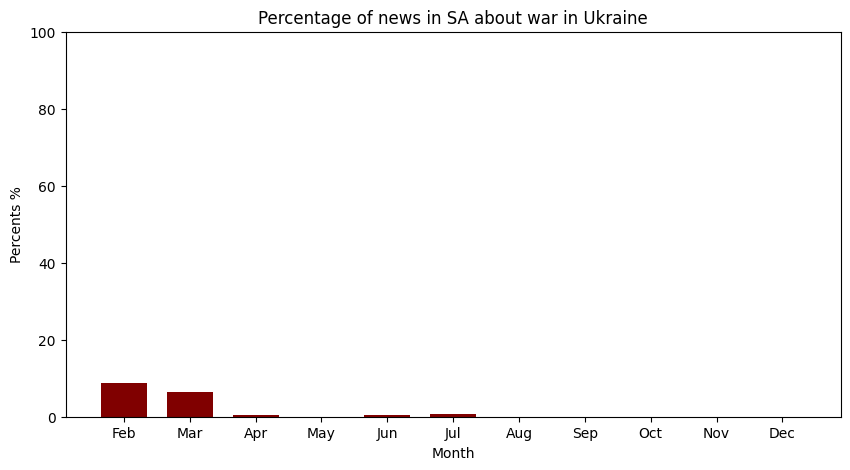

In [8]:
months = ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2022, color ='maroon', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine")
plt.show()

## Jan - May 2023

In [9]:
df_2023 = df[df['date'] >= datetime(2023, 1, 1)]
df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))

war_df_2023 = war_df[war_df['date'] >= datetime(2023, 1, 1)]
war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))
war_df_2023.head()

/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_96250/3617843910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['month'] = df_2023['date'].apply(lambda x: get_month(x))
/var/folders/p2/7kxcgmtx2t19yg6vq8h0bml40000gn/T/ipykernel_96250/3617843910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_df_2023['month'] = war_df_2023['date'].apply(lambda x: get_month(x))


,title,date,url,month
16,President Ramaphosa reiterates South Africa's ...,2023-05-15,https://www.sanews.gov.za/south-africa/preside...,5
651,SA explains abstention from Ukraine resolution...,2023-02-25,https://www.sanews.gov.za/south-africa/sa-expl...,2
968,Russia-Ukraine conflict should end through dip...,2023-01-23,https://www.sanews.gov.za/south-africa/russia-...,1
975,SA's navy exercises between China and Russia t...,2023-01-23,https://www.sanews.gov.za/south-africa/sas-nav...,1
982,SANDF to host China and Russia for multilatera...,2023-01-20,https://www.sanews.gov.za/south-africa/sandf-h...,1


In [10]:
war_perc_2023 = []
months = list(range(1, 6))
for month in months:
    month_df = df_2023[df_2023['month'] == month].shape[0]
    month_war_df = war_df_2023[war_df_2023['month'] == month].shape[0]
    try:
        war_perc_2023.append(round(month_war_df/month_df * 100, 2))
    except ZeroDivisionError:
        war_perc_2023.append(0.0)

### Building plot 2023

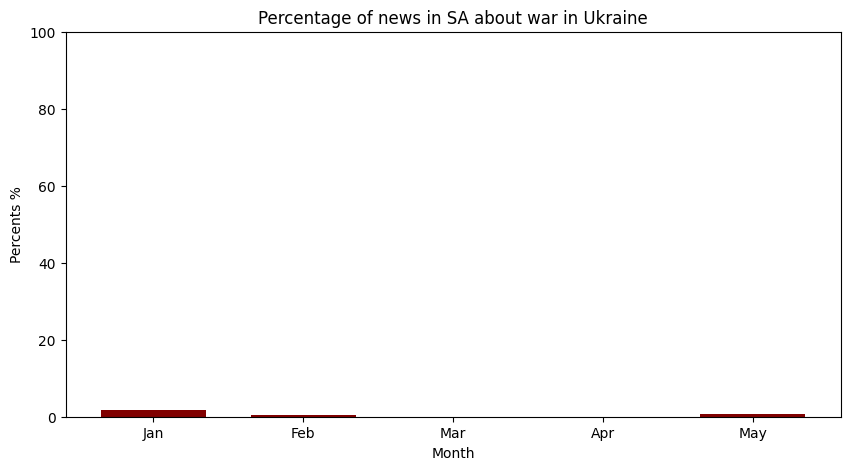

In [11]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, war_perc_2023, color ='maroon', width = 0.7)
plt.ylim(0, 100)

plt.xlabel("Month")
plt.ylabel("Percents %")
plt.title("Percentage of news in SA about war in Ukraine")
plt.show()